# Intrusion Detection Models using Machine Learning

## Importing Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
import random

# Avoid Printing Warnings

from warnings import filterwarnings
filterwarnings('ignore')

## Column Names

In [2]:
col_names = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

## Loading the Dataset

In [45]:
train = pd.read_csv('nsl-kdd/KDDTrain+.txt', header=None,names=col_names)
test = pd.read_csv('nsl-kdd/KDDTest+.txt', header=None,names=col_names)
df=pd.read_csv('nsl-kdd/KDDTrain+.txt', header=None,names=col_names)
df_test=pd.read_csv('nsl-kdd/KDDTest+.txt', header=None,names=col_names)

## Checking Data Dimensions

In [5]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
print(f'Dimensions of the Training set:{df.shape}')
print(f'Dimensions of the Test set:{df_test.shape}')

Dimensions of the Training set:(125973, 43)
Dimensions of the Test set:(22544, 43)


## Data Pre-Processing

#### Mapping Normal as 0 and Attack as 1 (Encoding)

In [46]:
# Train Dataset

is_attack = train.attack.map(lambda a: 0 if a == 'normal' else 1)

# Test Dataset

test_attack = test.attack.map(lambda a: 0 if a == 'normal' else 1)

#### Adding Column to Actual Dataset

In [47]:
# Adding to Train Dataset

train['attack_flag'] = is_attack

# Addings to Test Dataset

test['attack_flag'] = test_attack

In [12]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


#### Classifying Attacks into 4 Categories

There are a lot of different types of attacks provided in the dataset. We will classify the attacks into categories of 4 and then do the classification for these 4 classes.

The classification will be as follows:
1) Denial of Service attacks: apache2,back,land, neptune, mailbomb, pod, processtable, smurf, teardrop, udpstorm, worm

2) Probe attacks: ipsweep, mscan, nmap, portsweep, saint, satan

3) Privilege escalation attacks: buffer_overflow, loadmdoule, perl, ps, rootkit, sqlattack, xterm

4) Remote access attacks: ftp_write, guess_passwd, http_tunnel, imap, multihop, named, phf, sendmail, snmpgetattack, snmpguess, spy, warezclient, warezmaster, xclock, xsnoop

Hence the attack labels will  be - DOS, Probe, Privilege, Access, Normal

In [48]:
# lists to hold our attack classifications

dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [49]:
# Attack Labels

attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [50]:
# Mapping Attack Labels to Numbers

def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

In [51]:
# Mapping Data for Train Dataset

attack_map = train.attack.apply(map_attack)
train['attack_map'] = attack_map

In [52]:
# Mapping Data for Test Dataset

test_attack_map = test.attack.apply(map_attack)
test['attack_map'] = test_attack_map

In [19]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0,0


## Data Profiling and Visualization

#### Checking Attack Types and the Protocol Counts

In [20]:
attack_vs_protocol = pd.crosstab(train.attack, train.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [21]:
# Rendering Pie Charts

def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette('flare')
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs 

#### Normal Attack Class Counts

In [53]:
train['target'] = train.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
test['target'] = test.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
data = train['target'].value_counts()
lab = ['normal','attack']
data

0    67343
1    58630
Name: target, dtype: int64

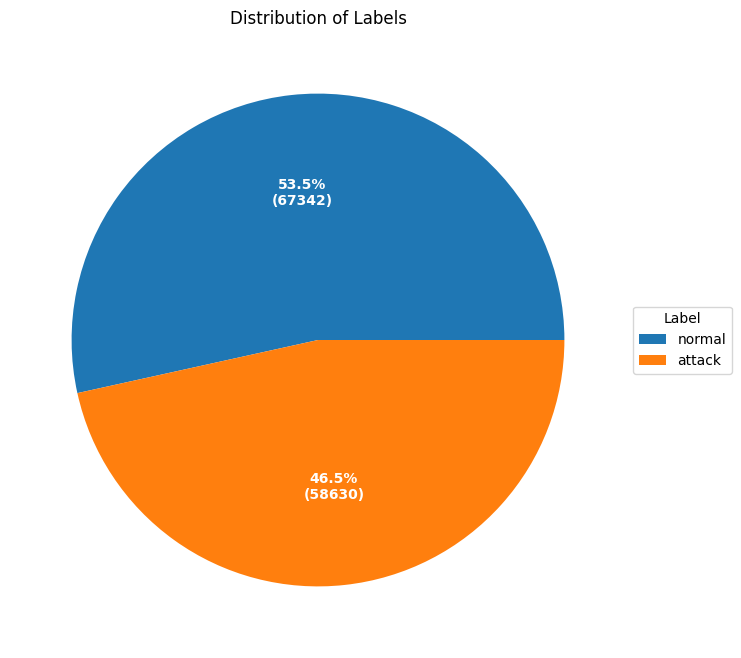

In [28]:
# Plotting Pie Chart

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Labels")

plt.show()

#### Attack Type Distribution

In [29]:
# Calculating Number of Occurences of Each Type of Attack

DOS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','upstorm','worm']
Probe = ['ipsweep','nmap','mscan','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','Snmpgetattack','spy','snmpguess','warzclient','warzmaster','xlock','xsnoop']
count = {'DOS':0, 'Probe':0, 'U2R':0, 'R2L':0}
for attack in train.attack:
    if attack in DOS:
        count['DOS'] += 1
    elif attack in Probe:
        count['Probe'] += 1
    elif attack in U2R:
        count['U2R'] += 1
    elif attack in R2L:
        count['R2L'] += 1
count

{'DOS': 45927, 'Probe': 11656, 'U2R': 52, 'R2L': 85}

#### Distribution of Attack Pie Chart

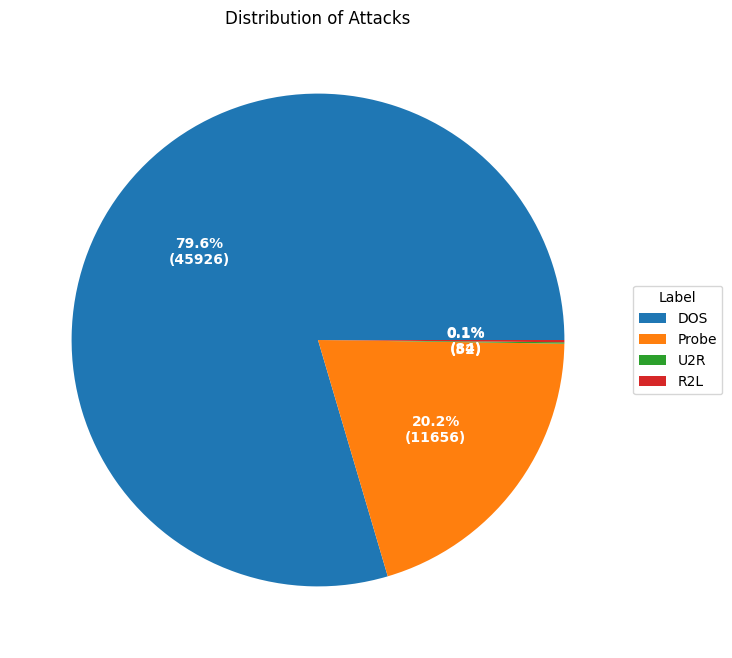

[45927, 11656, 52, 85]

In [30]:
data = list(count.values())
lab = list(count.keys())
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Attacks")

plt.show()
data

#### Protocols and Occurence of Attacks for Each Protocol

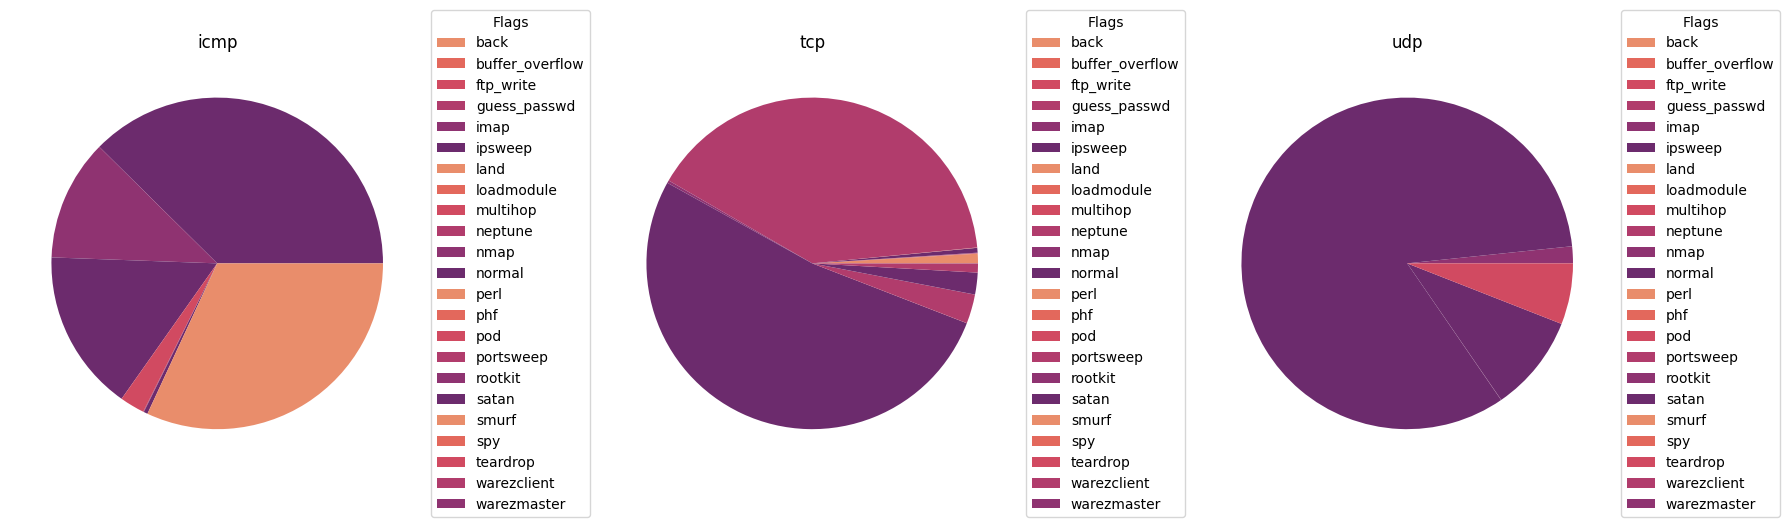

In [31]:
# get the series for each protocol

icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts

bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

#### Normal-Attack Attack Type Distribution

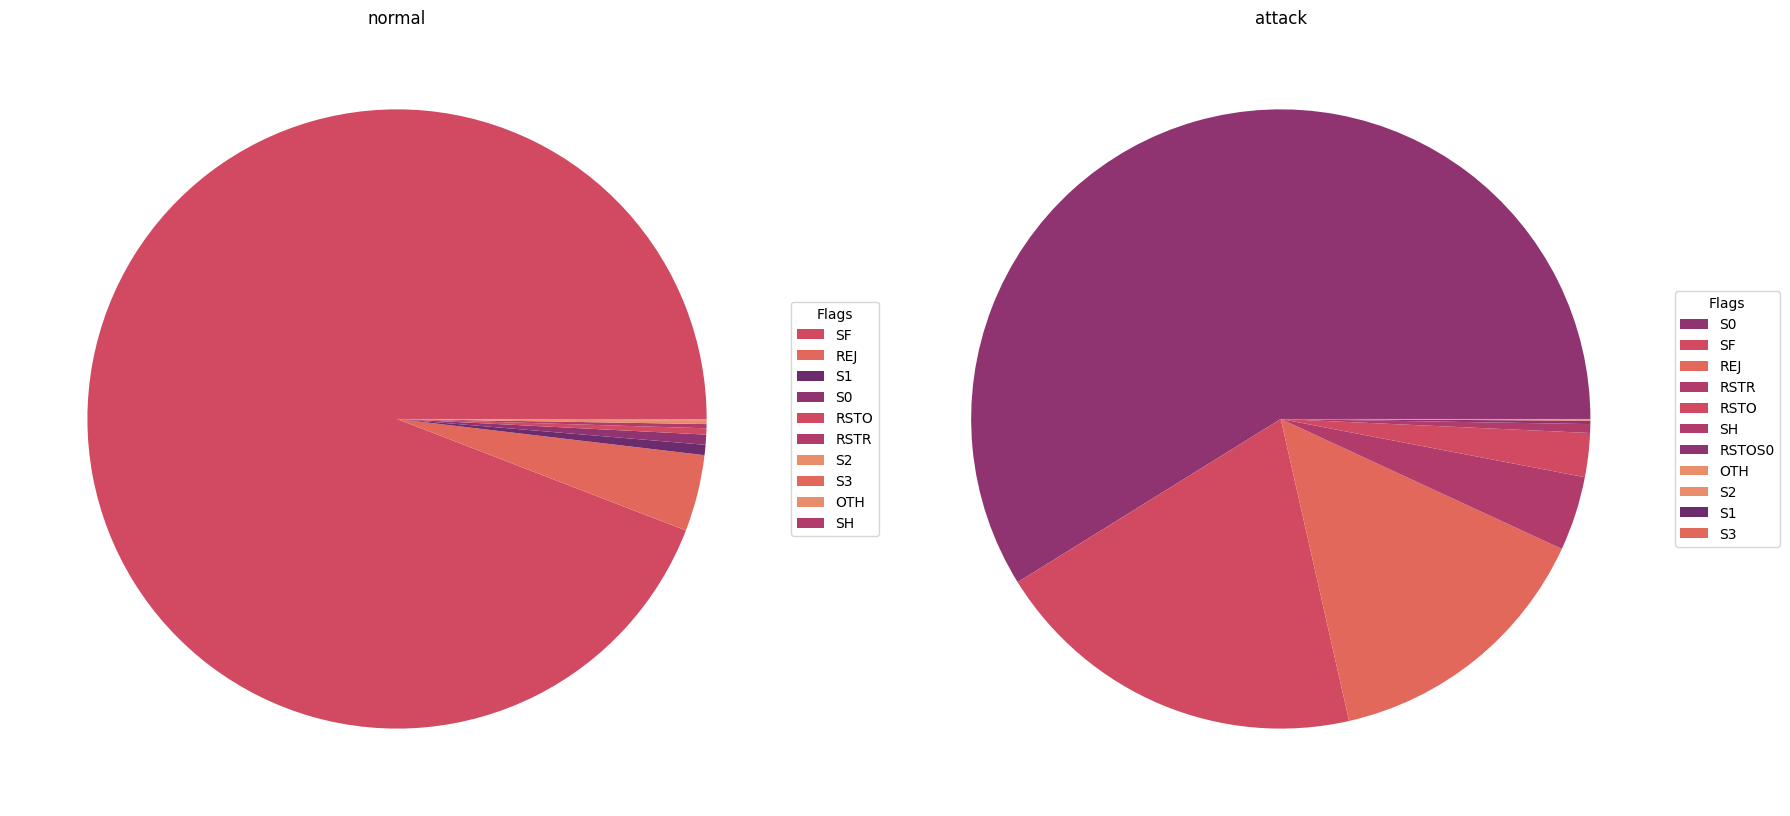

In [32]:
# get a series with the count of each flag for attack and normal traffic

normal_flags = train.loc[train.attack_flag == 0].flag.value_counts()
attack_flags = train.loc[train.attack_flag == 1].flag.value_counts()

# create the charts

flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

#### Attack Type vs Service Pie Chart

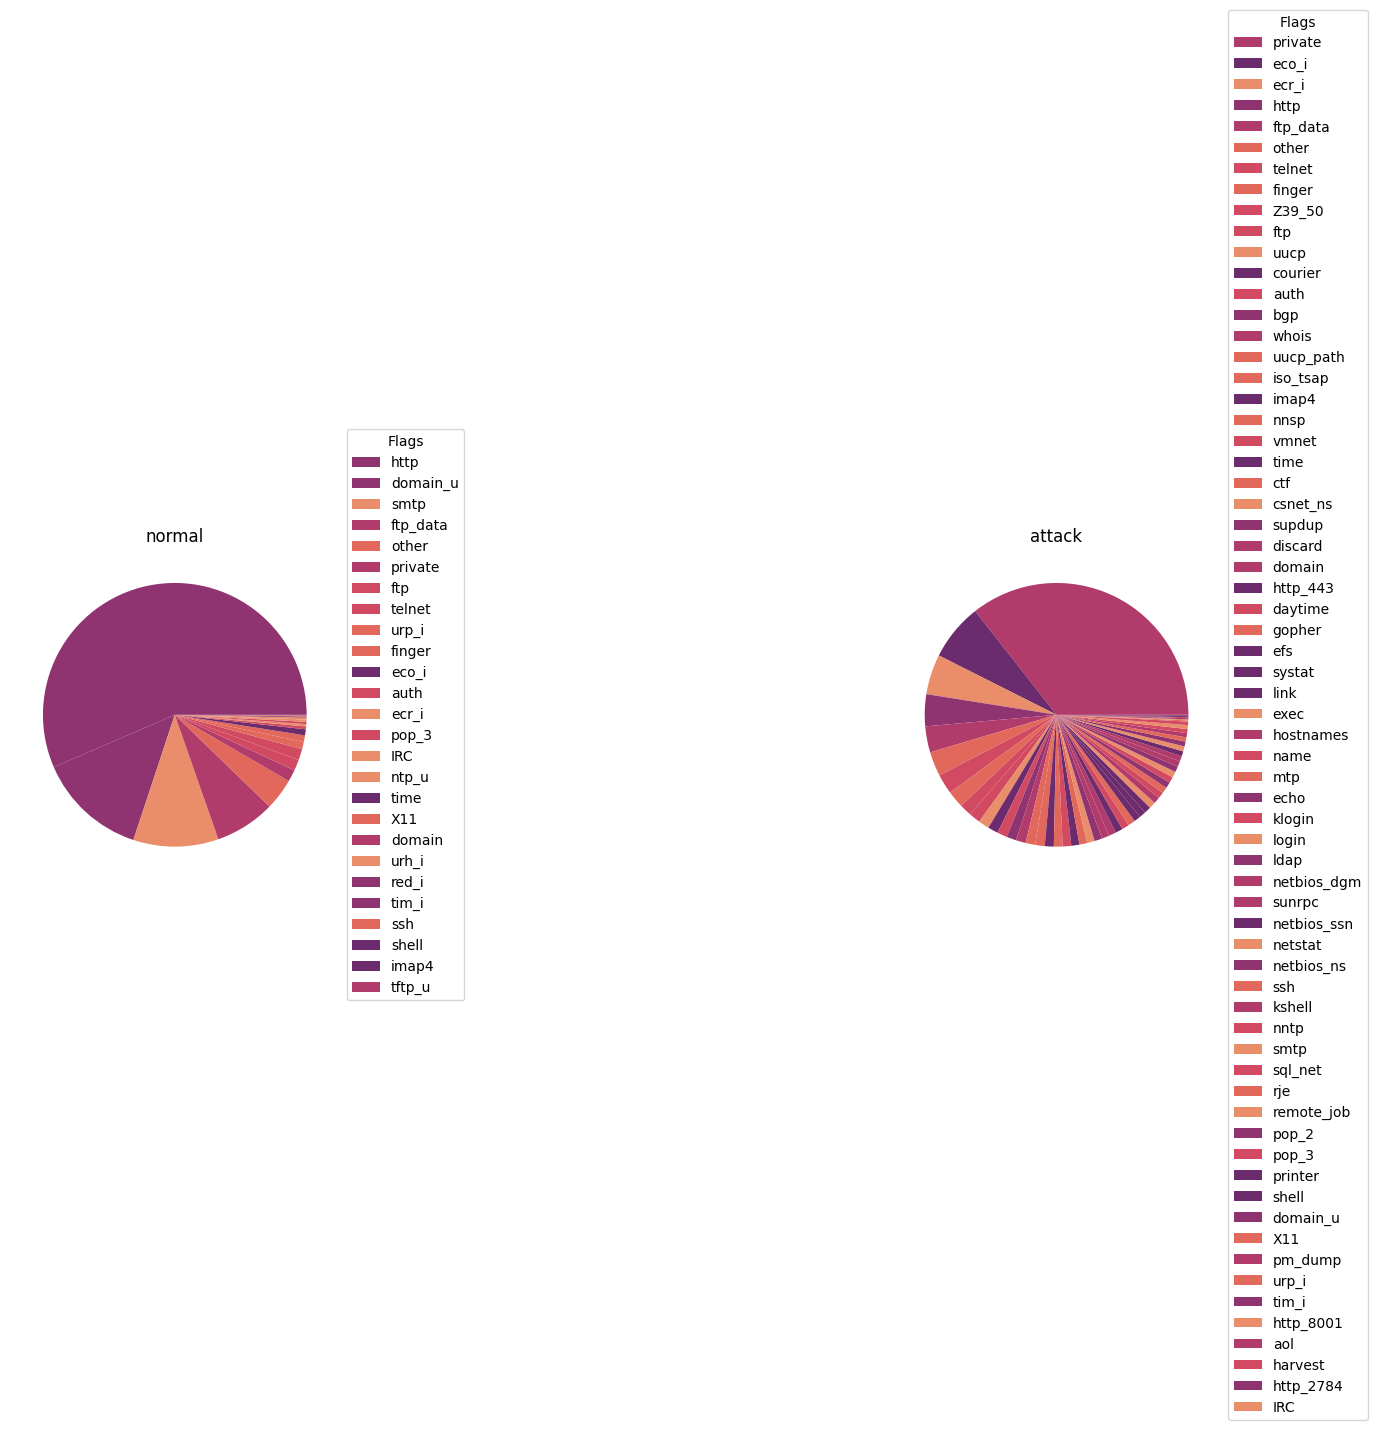

In [33]:
# get a series with the count of each service for attack and normal traffic

normal_services = train.loc[train.attack_flag == 0].service.value_counts()
attack_services = train.loc[train.attack_flag == 1].service.value_counts()

# create the charts

service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()

## Exploring the Attack Column in Detail

In [34]:
# Checking Value Counts of Train Dataset Attack Column

train.iloc[:,41].value_counts(dropna=False) # [:,41] - Means Select all rows, column 41

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [35]:
# Checking Value Counts of Test Dataset Attack Column

test.iloc[:,41].value_counts(dropna=False) # [:,41] - Means Select all rows, column 41

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

#### Removing "Severity" Column as it is Irrelevant to Results

In [54]:
# Removing Serverity Column

train.drop(train.iloc[:, 41:45], inplace = True, axis = 1)
test.drop(test.iloc[:, 41:45], inplace = True, axis = 1)

In [55]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


## OneHotEncoding The Categorical Columns

In [56]:
#OneHotEncoding

categorical = [1,2,3]
encoder = LabelEncoder()
for col in categorical:
    train.iloc[:,col] = pd.Series(encoder.fit_transform(train.iloc[:,col]))
    test.iloc[:,col] = pd.Series(encoder.transform(test.iloc[:,col]))   

## Train Test Split

In [57]:
train = pd.concat([train,test],axis=0)

X = train.drop(columns='target',axis=1)
y = train.target

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))

X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=10)

# Implementing Different Machine Learning Models

### Decision Tree

In [58]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)

clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
pred_dt = clf.predict(X_test)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f'Test score: {clf.score(X_test, y_test)}')
print(f"Classification report:\n {classification_report(pred_dt,y_test)}")
print(f"Average weighted precision: {precision_score(y_test,pred_dt)}")
print(f"Average weighted recall: {recall_score(y_test,pred_dt)}")
print(f"Average weighted f1 score: {f1_score(y_test,pred_dt)}")

Train score: 0.9236625458985339
Test score: 0.9242391597091301
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     19925
           1       0.90      0.94      0.92     17205

    accuracy                           0.92     37130
   macro avg       0.92      0.93      0.92     37130
weighted avg       0.93      0.92      0.92     37130

Average weighted precision: 0.9384481255448998
Average weighted recall: 0.9020111731843575
Average weighted f1 score: 0.9198689645349665


### Decision Tree using Recursive Feature Elimination (RFE)

In [59]:
# Dropping Column level

df.drop(['level'], axis=1,inplace=True)
df_test.drop(['level'], axis=1,inplace=True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [60]:
# OneHotEncoding Columns

from sklearn.preprocessing import OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

# insert code to get a list of categorical columns into a variable, categorical_columns

categorical_columns=['protocol_type', 'service', 'flag'] 

# Get the categorical values into a 2D numpy array

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [61]:
# Getting Unique Protocol_type

unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# Getting Unique_service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

# Getting Unique Flags
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# Dummy Column Headings
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

# Repeating Same for Test Dataset
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [62]:
# Encoding Categorical Variables

df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

# Applying Same to Test Dataset 
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [63]:
# One Hot Encoding The Columns

enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)

# Test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Test Dataset has More Categories than Train which have to be dealt with

In [64]:
# Checking Symmetric Difference of Services

trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()

# Difference
difference=list(set(trainservice) - set(testservice))

# Creating New Column Names
string = 'service_'
difference=[string + x for x in difference]
difference

['service_urh_i',
 'service_http_2784',
 'service_harvest',
 'service_red_i',
 'service_http_8001',
 'service_aol']

In [65]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [66]:
# Creating New DataFrame
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# Test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [67]:
# Label Column Train and Test

label_df=newdf['attack']
label_df_test=newdf_test['attack']

# Transforming Categorical Values to Numbers (5 Categories)
new_label_df=label_df.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 
                            'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 
                            'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                            'worm': 1, 'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,
                            'satan' : 2,'mscan' : 2,'saint' : 2,
                            'ftp_write': 3,'guess_passwd': 3,'imap': 3,
                            'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,
                            'warezmaster': 3,'sendmail': 3,'named': 3,
                            'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,
                            'xsnoop': 3,'httptunnel': 3, 'buffer_overflow': 4,
                            'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,
                            'sqlattack': 4,'xterm': 4})

# Transforming Categorical Values to Numbers (5 Categories)
new_label_df_test=label_df_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1,
                                      'land': 1, 'pod': 1, 'smurf': 1, 
                                      'teardrop': 1,'mailbomb': 1, 'apache2': 1,
                                      'processtable': 1, 'udpstorm': 1, 
                                      'worm': 1, 'ipsweep' : 2,'nmap' : 2,
                                      'portsweep' : 2,'satan' : 2,'mscan' : 2,
                                      'saint' : 2, 'ftp_write': 3,
                                      'guess_passwd': 3,'imap': 3,'multihop': 3,
                                      'phf': 3,'spy': 3,'warezclient': 3,
                                      'warezmaster': 3,'sendmail': 3,'named': 3,
                                      'snmpgetattack': 3,'snmpguess': 3,
                                      'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                                      'buffer_overflow': 4,'loadmodule': 4,
                                      'perl': 4,'rootkit': 4,'ps': 4,
                                      'sqlattack': 4,'xterm': 4})

# Put Back the Dataframe
newdf['attack'] = new_label_df
newdf_test['attack'] = new_label_df_test
print(newdf['attack'].head())

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64


#### Separating Data Based on The Category of Attack

In [69]:
# Column Index Values to Drop

to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

# Applying Same for Test Dataset

DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];

print('Train')
print("=================================")
print(f'Dimensions of DoS: {DoS_df.shape}')
print(f'Dimensions of Probe: {Probe_df.shape}')
print(f'Dimensions of R2L: {R2L_df.shape}')
print(f'Dimensions of U2R: {U2R_df.shape}')
print('\n\nTest')
print("=================================")
print(f'Dimensions of DoS: {DoS_df_test.shape}')
print(f'Dimensions of Probe: {Probe_df_test.shape}')
print(f'Dimensions of R2L: {R2L_df_test.shape}')
print(f'Dimensions of U2R: {U2R_df_test.shape}')

Train
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)


Test
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


#### Train Test Split

In [70]:
# Split dataframes into X & Y

X_DoS = DoS_df.drop('attack',1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack',1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack',1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack',1)
Y_U2R = U2R_df.attack

# Repeat for Test Dataset

X_DoS_test = DoS_df_test.drop('attack',1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack',1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack',1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack',1)
Y_U2R_test = U2R_df_test.attack

In [71]:
# Getting Column Names

colNames = list(X_DoS)
colNames_test = list(X_DoS_test)

##### Scaling the Data

In [73]:
from sklearn import preprocessing

# Train Data Scaling

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# Test Data Scaling

scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

##### Feature Selection Using RFE

In [74]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
classif = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=classif, n_features_to_select=13, step=1)

# DoS Attack Type

Y_DoS = Y_DoS.astype('int') 
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [75]:
# Probe Attack Type

Y_Probe = Y_Probe.astype('int')
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [76]:
# R2L Attack Type

Y_R2L = Y_R2L.astype('int')
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [77]:
# U2R Attack Type

Y_U2R = Y_U2R.astype('int')
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

#### Selected Features

In [78]:
print(f'Features selected for DoS: {rfecolname_DoS}')
print(f'\nFeatures selected for Probe: {rfecolname_Probe}')
print(f'\nFeatures selected for R2L: {rfecolname_R2L}')
print(f'\nFeatures selected for U2R: {rfecolname_U2R}')

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_access_files', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_count', 'dst_host_count', 'dst_host_same_sr

##### Fitting the Model

In [79]:
# Declaring Objects

clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)

# Fitting Models

clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [80]:
# Generating Test Sets

X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]

In [81]:
# Testing for DOS

Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9602,109
1,2625,4835


In [82]:
# Testing for Probe

Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8709,1002
2,944,1477


In [83]:
# Testing for R2L

Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9649,62
3,2560,325


In [84]:
# Testing for U2R

Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9706,5
4,52,15


In [85]:
# Cross Val Scores for DOS

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, 
                           scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, 
                            scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, 
                         scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99738 (+/- 0.00267)
Precision: 0.99692 (+/- 0.00492)
Recall: 0.99705 (+/- 0.00356)
F-measure: 0.99698 (+/- 0.00307)


In [86]:
# Cross Val Scores for Probe

accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                           scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                            scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                         scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                    scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99085 (+/- 0.00559)
Precision: 0.98674 (+/- 0.01179)
Recall: 0.98467 (+/- 0.01026)
F-measure: 0.98566 (+/- 0.00871)


In [87]:
# Cross Val Scores for R2L

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                           scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                            scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                         scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                    scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97459 (+/- 0.00910)
Precision: 0.96689 (+/- 0.01311)
Recall: 0.96086 (+/- 0.01571)
F-measure: 0.96379 (+/- 0.01305)


In [88]:
# Cross Val Scores for U2R

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                           scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                            scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                         scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                    scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99652 (+/- 0.00278)
Precision: 0.87538 (+/- 0.15433)
Recall: 0.89540 (+/- 0.14777)
F-measure: 0.87731 (+/- 0.09647)


#### Generating Decision Tree Diagram

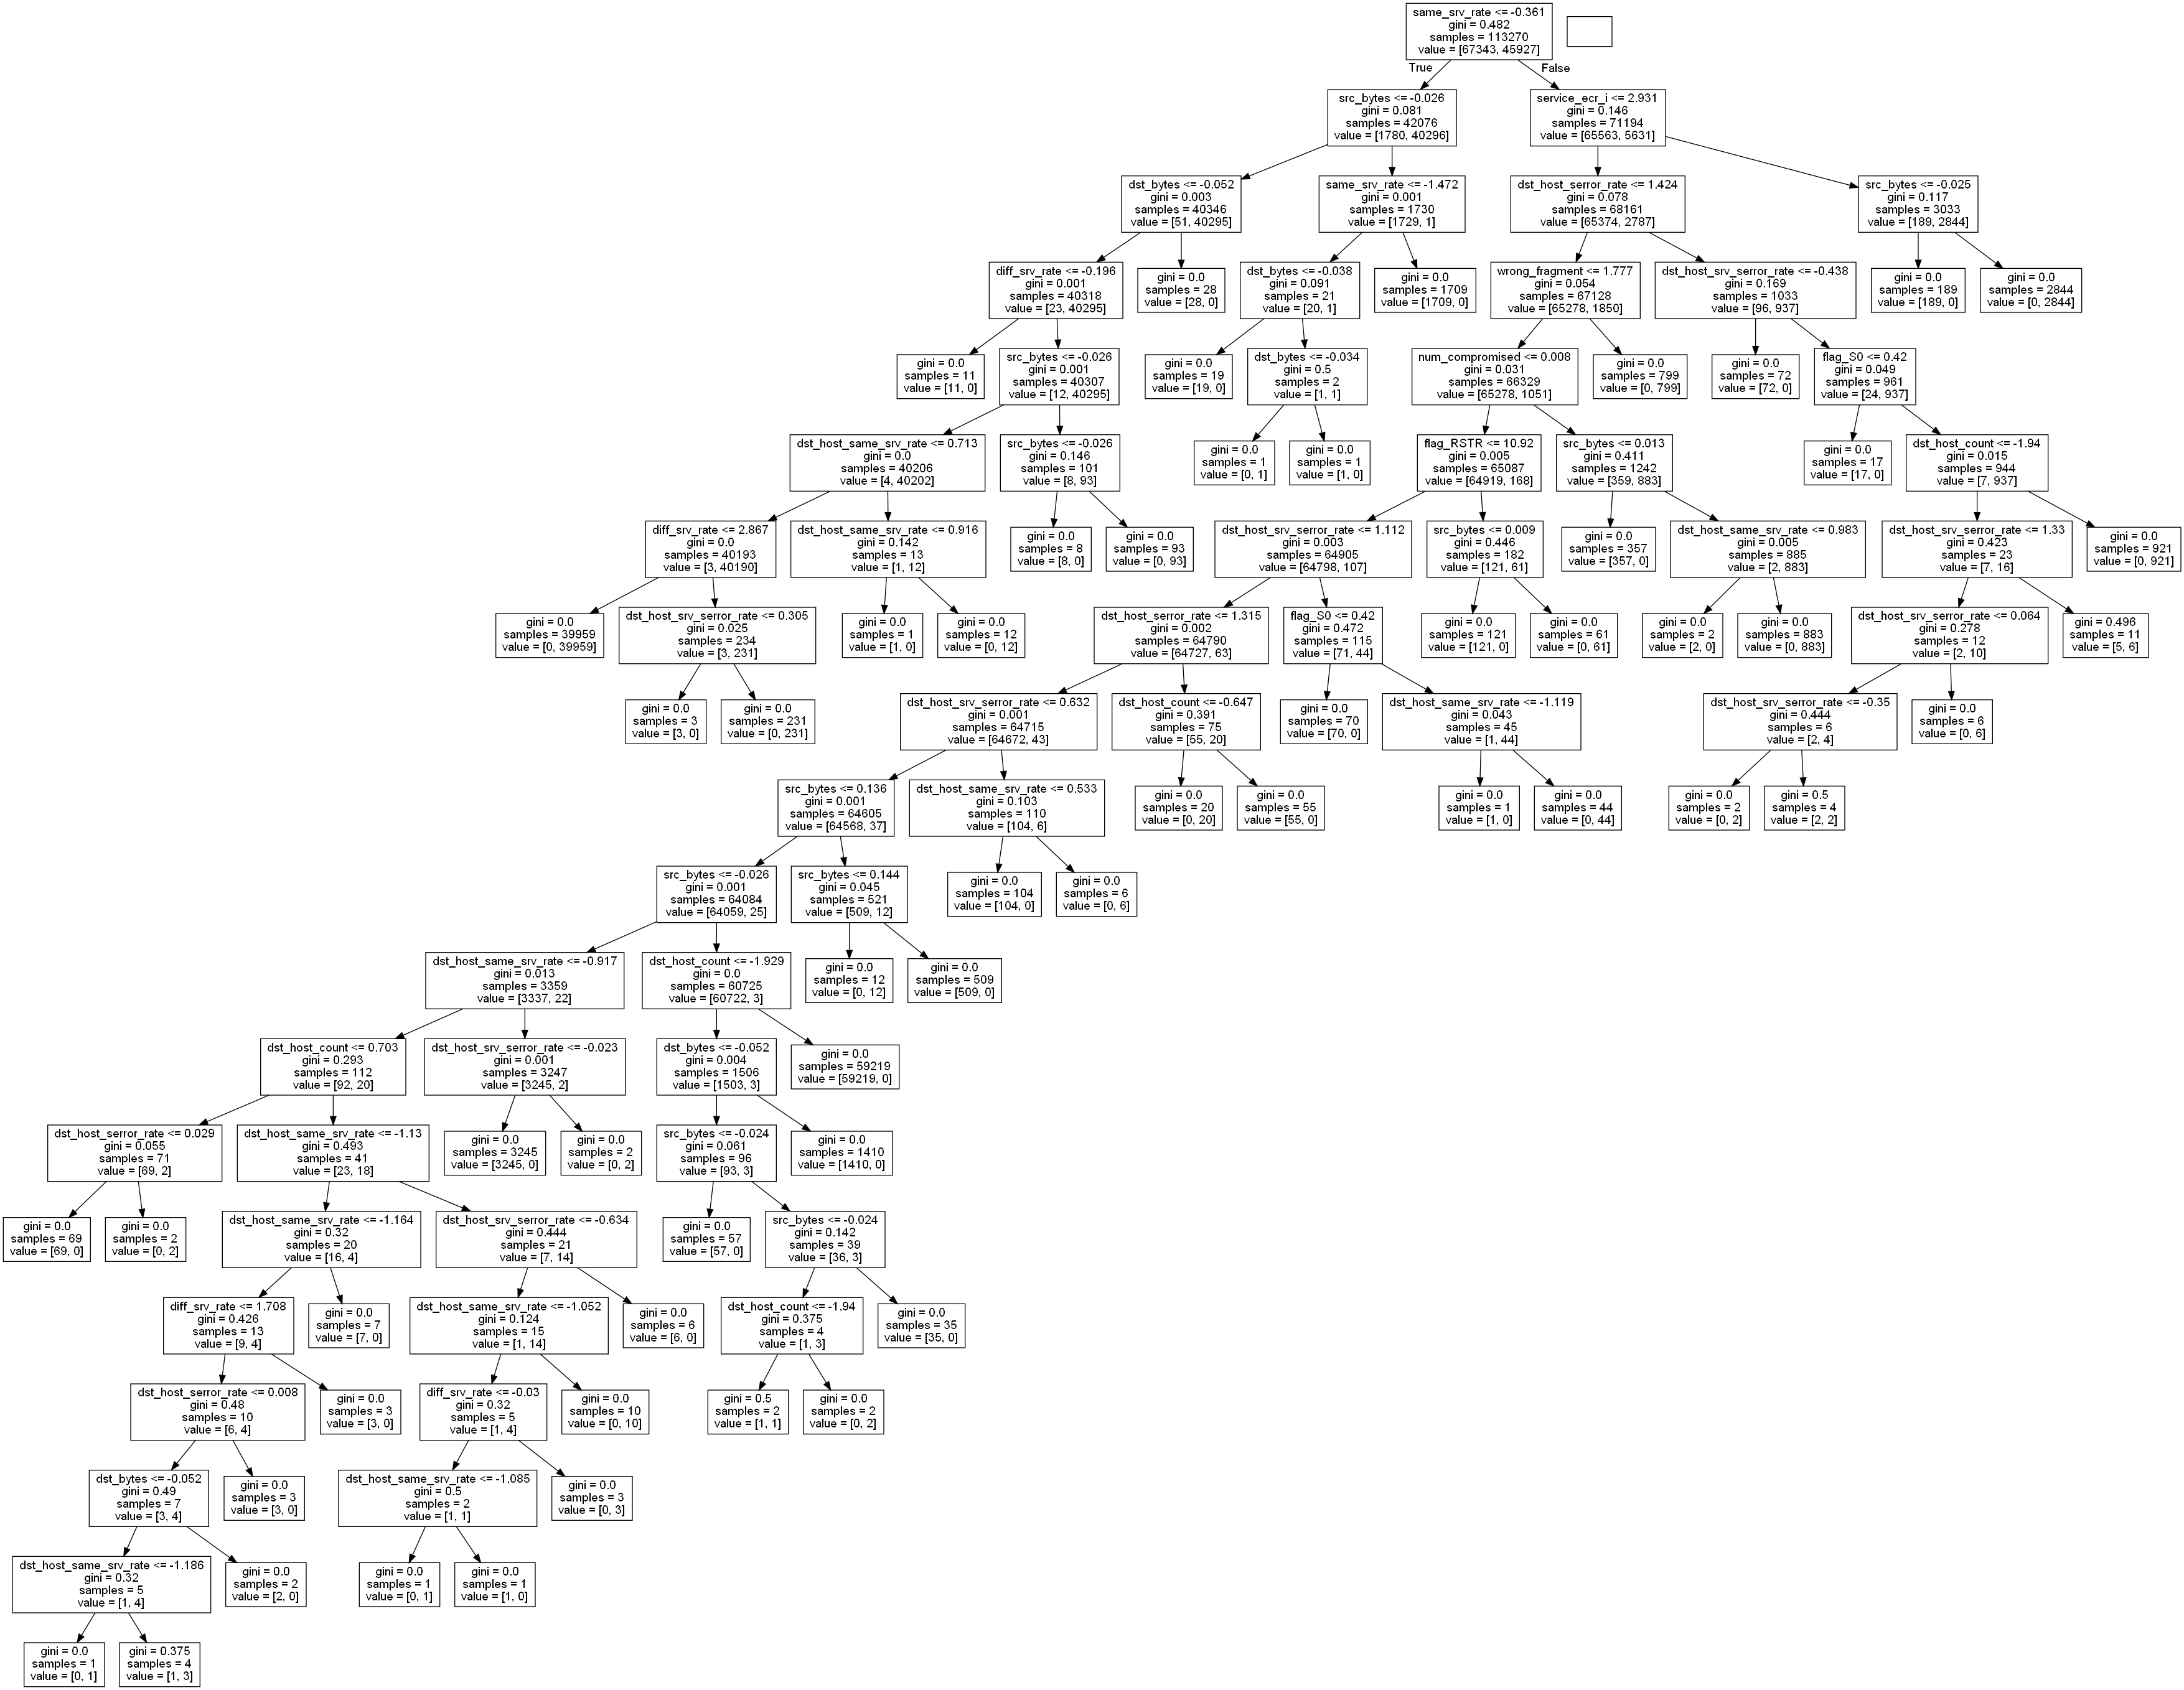

In [91]:
import sklearn
from sklearn import tree
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf_rfeDoS, out_file=None, 
                                feature_names=rfecolname_DoS)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Random Forest